#### <i> Enhancing Mental Health Interventions in the USA with Semi-Supervised Learning An AI Approach to Emotion Prediction </i>
#### <i> Dataset Link ---> https://www.kaggle.com/datasets/emirhanai/emotion-prediction-with-semi-supervised-learning </i>
#### <i> Import Library Files </i>

In [12]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Your existing code goes here


#### <i> Load The Dataset </i>

In [13]:
data = pd.read_csv("tweet_emotions.csv")
data

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


#### <i> Dataset OVerview </i>

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [15]:
data.describe()

,tweet_id
count,4.000000e+04
mean,1.845184e+09
std,1.188579e+08
min,1.693956e+09
25%,1.751431e+09
50%,1.855443e+09
75%,1.962781e+09
max,1.966441e+09


#### <i> Data Visulization And Analysis </i>

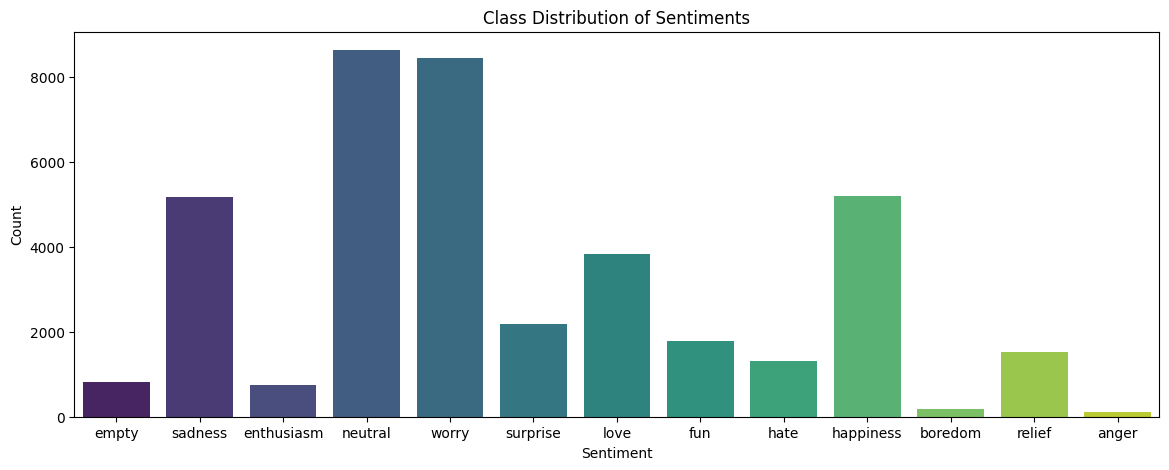

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Class Distribution Visualization
plt.figure(figsize=(14, 5))
sns.countplot(x='sentiment', data=data, palette='viridis')
plt.title('Class Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


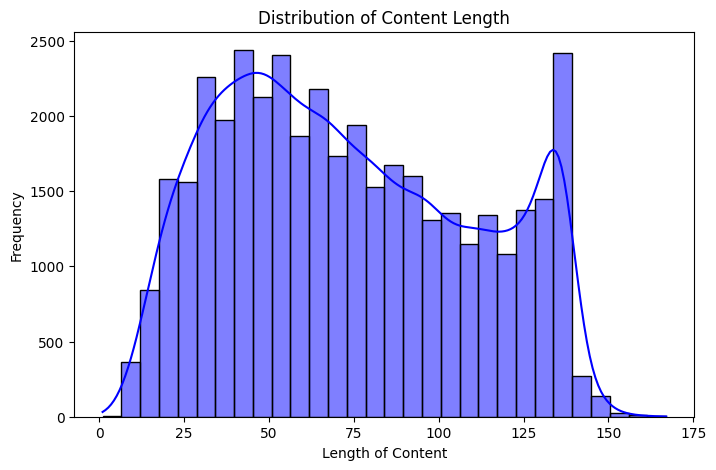

In [17]:

# Length of Content Distribution
data['content_length'] = data['content'].apply(len)
plt.figure(figsize=(8, 5))
sns.histplot(data['content_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Content Length')
plt.xlabel('Length of Content')
plt.ylabel('Frequency')
plt.show()

#### <i> Data Preprocessing </i>

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


# Check for null values
if data.isnull().sum().any():
    print("Dataset contains missing values. Cleaning...")
    data.dropna(inplace=True)

# Define features (content) and target (sentiment)
X = data['content']
y = data['sentiment']

# Convert text data into numerical format using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#### <i> Modeling </i>
#### <i> Logistic Regression </i>

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
print("\nTraining Logistic Regression...")
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Results
print("Results for Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.2f}")
print(classification_report(y_test, y_pred_log_reg))




Training Logistic Regression...
Results for Logistic Regression:
Accuracy: 0.35
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        19
     boredom       0.00      0.00      0.00        31
       empty       0.33      0.01      0.01       162
  enthusiasm       0.00      0.00      0.00       163
         fun       0.03      0.00      0.01       338
   happiness       0.34      0.36      0.35      1028
        hate       0.49      0.14      0.22       268
        love       0.52      0.38      0.44       762
     neutral       0.34      0.57      0.43      1740
      relief       0.31      0.02      0.04       352
     sadness       0.33      0.25      0.29      1046
    surprise       0.37      0.05      0.09       425
       worry       0.33      0.49      0.39      1666

    accuracy                           0.35      8000
   macro avg       0.26      0.17      0.17      8000
weighted avg       0.34      0.35      0.31      8000

#### <i> Random Forest Classifier </i>

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
print("\nTraining Random Forest...")
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Results
print("Results for Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(classification_report(y_test, y_pred_rf))





Training Random Forest...
Results for Random Forest:
Accuracy: 0.33
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        19
     boredom       0.00      0.00      0.00        31
       empty       0.00      0.00      0.00       162
  enthusiasm       0.00      0.00      0.00       163
         fun       0.06      0.01      0.01       338
   happiness       0.34      0.31      0.33      1028
        hate       0.38      0.15      0.21       268
        love       0.46      0.37      0.41       762
     neutral       0.33      0.53      0.40      1740
      relief       0.23      0.02      0.03       352
     sadness       0.38      0.18      0.24      1046
    surprise       0.15      0.01      0.02       425
       worry       0.30      0.52      0.38      1666

    accuracy                           0.33      8000
   macro avg       0.20      0.16      0.16      8000
weighted avg       0.30      0.33      0.29      8000



#### <i> SVC </i>

In [21]:
from sklearn.svm import SVC

# Support Vector Machine
svc_clf = SVC(kernel='linear', random_state=42)
print("\nTraining Support Vector Machine...")
svc_clf.fit(X_train, y_train)
y_pred_svc = svc_clf.predict(X_test)

# Results
print("Results for Support Vector Machine:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.2f}")
print(classification_report(y_test, y_pred_svc))





Training Support Vector Machine...
Results for Support Vector Machine:
Accuracy: 0.35
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        19
     boredom       0.00      0.00      0.00        31
       empty       0.00      0.00      0.00       162
  enthusiasm       0.00      0.00      0.00       163
         fun       0.05      0.01      0.01       338
   happiness       0.33      0.39      0.36      1028
        hate       0.44      0.19      0.26       268
        love       0.51      0.39      0.44       762
     neutral       0.34      0.55      0.42      1740
      relief       0.46      0.03      0.06       352
     sadness       0.35      0.23      0.28      1046
    surprise       0.38      0.05      0.08       425
       worry       0.34      0.49      0.40      1666

    accuracy                           0.35      8000
   macro avg       0.25      0.18      0.18      8000
weighted avg       0.34      0.35      0.31    

#### <i> Comparison Of Models </i>

Model Accuracy Comparison:
Logistic Regression: 0.35
Random Forest: 0.33
Support Vector Machine: 0.35


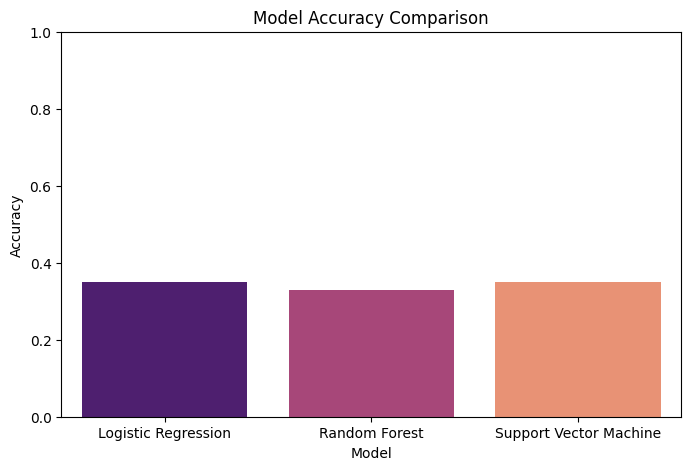

In [22]:
# Store accuracies for comparison
model_accuracies = {
    "Logistic Regression": accuracy_score(y_test, y_pred_log_reg),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "Support Vector Machine": accuracy_score(y_test, y_pred_svc)
}

# Print accuracies
print("Model Accuracy Comparison:")
for model_name, accuracy in model_accuracies.items():
    print(f"{model_name}: {accuracy:.2f}")

# Bar plot for comparison
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette='magma')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()
